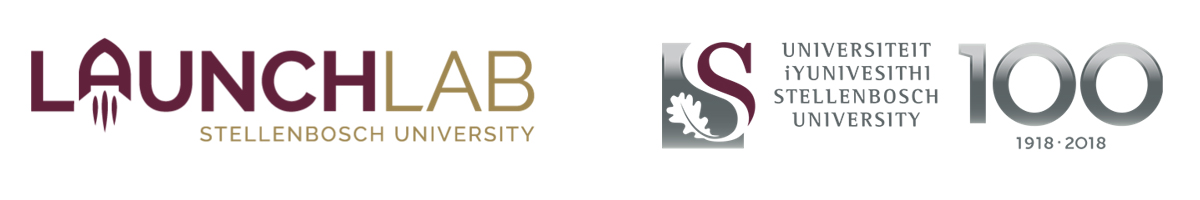

# Assignment \#6: Supervised Learning
This assignment consists of regression and classification sections.

Below are all the libraries required to complete this assignment. You are allowed to use any additional libraries you desire. 

Take a moment to look at the existing imports to aid you in solving the questions below.

In [115]:
# imports 
import pandas as pd
import sklearn
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors

import torch 
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

import torchvision
from torch import optim

from sklearn.metrics import confusion_matrix
%matplotlib inline


# Regression
For the regression part of this assignment you will be using the data in 'abalone.csv'

This dataset contains various measurements that can be used to predict the age of an abalone.


   Given is the attribute name, attribute type, the measurement unit and a
   brief description. 

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

The number of rings is the value to predict. 

## Execute the cell below to read in the data

In [116]:
dataset = pd.read_csv('abalone.csv', index_col=0)
dataset

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.525,0.430,0.125,0.8130,0.3315,0.1660,0.1775,12
1,M,0.625,0.495,0.180,1.0815,0.4715,0.2540,0.3135,10
2,F,0.505,0.390,0.115,0.6600,0.3045,0.1555,0.1750,8
3,I,0.415,0.310,0.105,0.3595,0.1670,0.0830,0.0915,6
4,M,0.530,0.410,0.140,0.6810,0.3095,0.1415,0.1835,6
...,...,...,...,...,...,...,...,...,...
995,F,0.715,0.585,0.230,2.0725,0.8655,0.4095,0.5650,10
996,I,0.550,0.425,0.130,0.6640,0.2695,0.1630,0.2100,8
997,F,0.450,0.360,0.110,0.4470,0.2030,0.0820,0.1300,12
998,F,0.455,0.365,0.115,0.4305,0.1840,0.1080,0.1245,8


## Conditional plots
Visualise the correlation of each variable using a multi-plot grid with scatterplots and density functions on the diagonal.

Use colours to differentiate between Male, Female and Infant abalones.

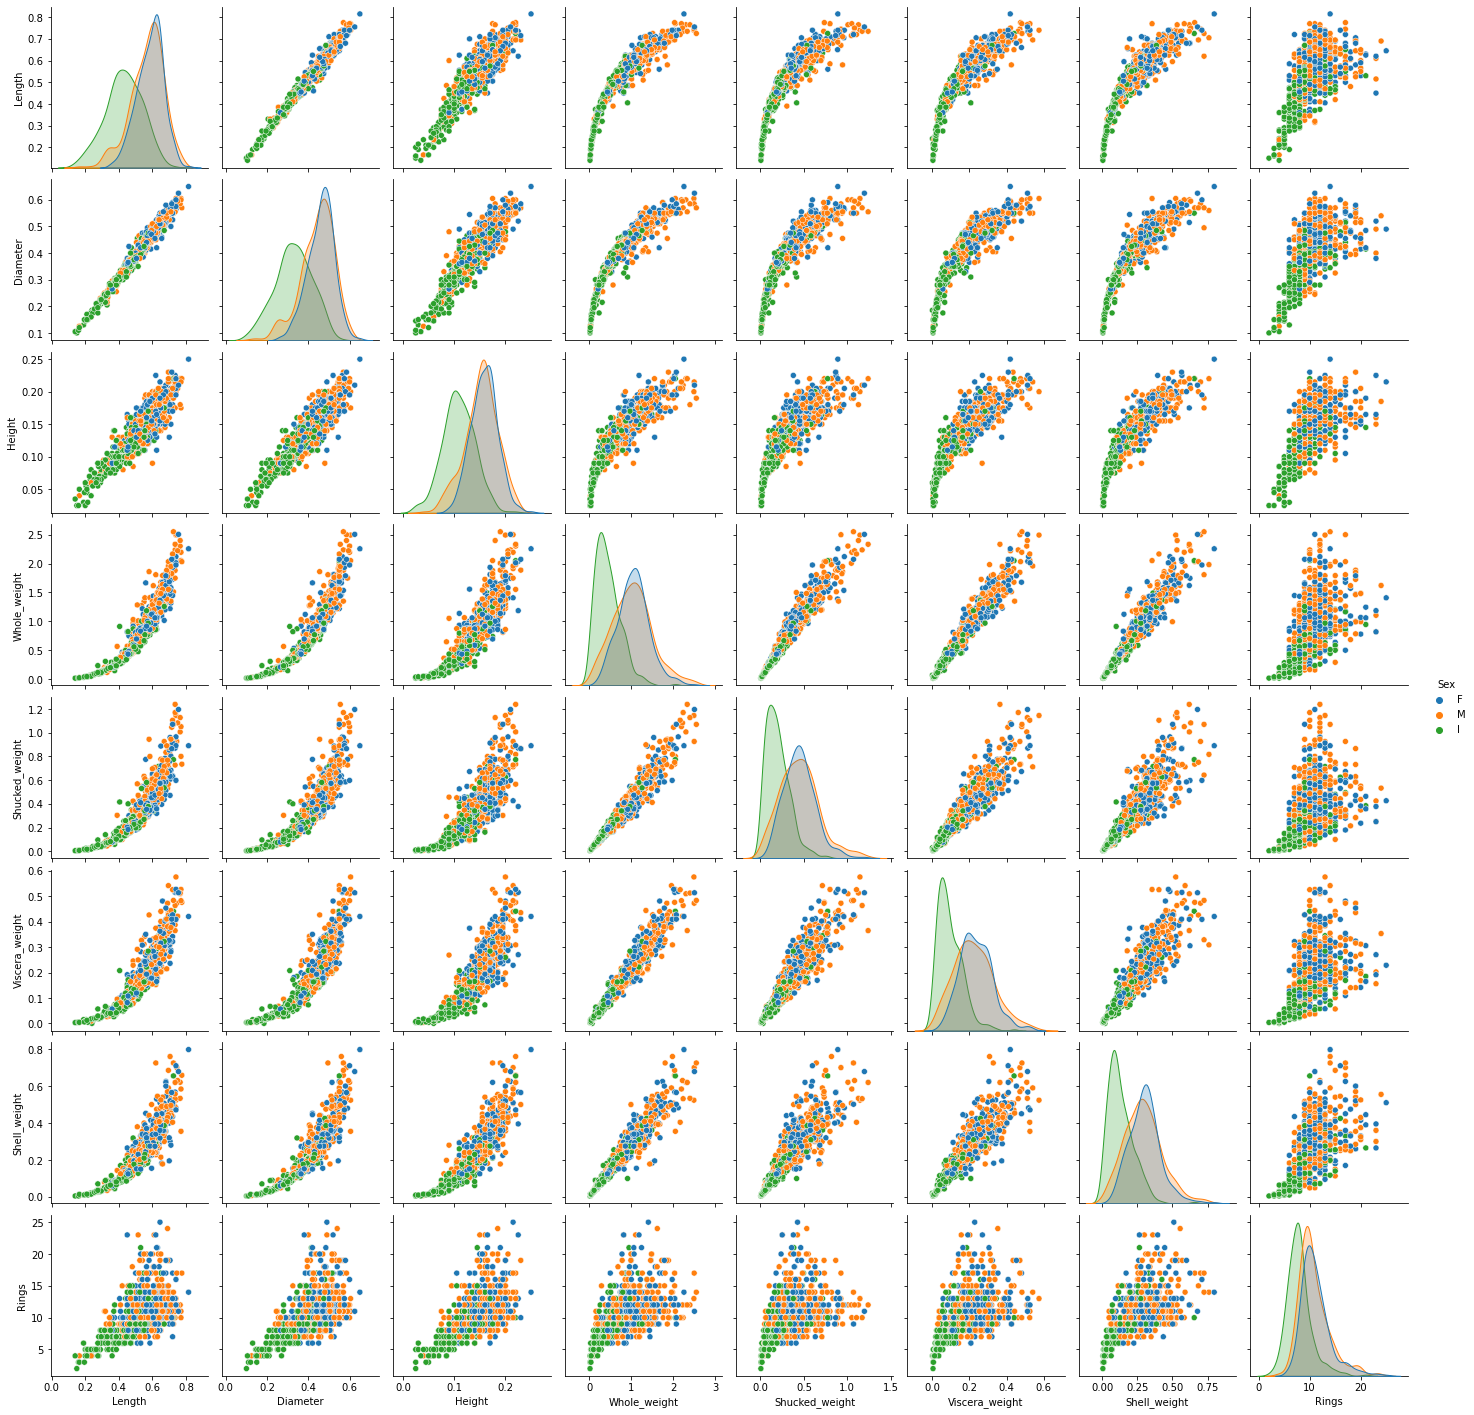

In [7]:
# insert code here
sns.pairplot(data=dataset, hue = 'Sex', diag_kind='kde')
plt.show()

## The dataset requires cleaning before it can be used to train a model
Start of by writing code below to one-hot encode the nominal feature 'Sex'.

Display the resulting dataframe.

In [117]:
# insert code here
df = pd.get_dummies(dataset, columns = ['Sex'])
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.525,0.430,0.125,0.8130,0.3315,0.1660,0.1775,12,1,0,0
1,0.625,0.495,0.180,1.0815,0.4715,0.2540,0.3135,10,0,0,1
2,0.505,0.390,0.115,0.6600,0.3045,0.1555,0.1750,8,1,0,0
3,0.415,0.310,0.105,0.3595,0.1670,0.0830,0.0915,6,0,1,0
4,0.530,0.410,0.140,0.6810,0.3095,0.1415,0.1835,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.715,0.585,0.230,2.0725,0.8655,0.4095,0.5650,10,1,0,0
996,0.550,0.425,0.130,0.6640,0.2695,0.1630,0.2100,8,0,1,0
997,0.450,0.360,0.110,0.4470,0.2030,0.0820,0.1300,12,1,0,0
998,0.455,0.365,0.115,0.4305,0.1840,0.1080,0.1245,8,1,0,0


## It is always good practise to normalise your data, explain why this is the case.

Normalising data gives equal weights to each variable so that a single variable with large values does not steer the model in one direction, thereby improving the accuracy of the model.

## Write code below to normalise the data as follows:
Each feature in the dataset should have a mean of 0 and a standard deviation of 1.


Thereafter split the input and and target data into two seperate numpy array and print out the first record of each.


In [118]:
# insert code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

input_data = np.array(X[:,[0,1,2,3,4,5,6,8,9,10]])
target = np.array(X[:, 7])
print('input data: ' + str(input_data[0,]))
print('target data: ' + str(target[0,]))

input data: [-0.03472289  0.18810568 -0.41272892 -0.07148708 -0.16020628 -0.18185969
 -0.47880698  1.46784677 -0.67969722 -0.76143209]
target data: 0.6381841512804235


## Finally the seperate the data into a training set, validation set and test set as follows:
Training set: indexes 0 to 799

Validation set: indexes 800 to 899

Test set: indexes 900 to 999

## Also, complete the function below to calculate and return the RMSE of a given set of predictions

In [119]:
from sklearn.metrics import mean_squared_error as MSE
def Score(target, prediction):
    
    # insert code here to calculate RMSE
    RMSE = MSE(target,prediction)*(1/2)
    return RMSE

# insert code here to seperate the data
X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.2, shuffle =False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle = False)

## You will now be training and tuning various models and comparing their performance.
To tune hyperparameters, induce multiple models with differing hyperparameter values and compute the RSME on the validation set for each.

Choose the best performing instance of a model and add it to the following dictionary.

In [124]:
best_models = {'LinReg': reg,
          'SVR': svr,
          'RegTree':dt,
          'KNN':knn}

## Linear Regression
For linear regression there are no parameters to be tuned. 

Therefore simply train a linear regression model and output the RMSE on the validation set.

In [120]:
# insert code here
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
rmse = Score(y_test, pred)
print(rmse)

0.22284232642790003


## SVR with Gaussian kernel function.
There are two hyperparameters that needs to be tuned, gamma and C.

For gamma, we simply use the default value provided by sklearn.

Tune the value of C on the validation set.
For each value of C plot the training set loss as well as the validation set loss.

[0.2138657768552924, 0.21073742889144279, 0.2038199470609912, 0.2009148471282737, 0.20126053286497936, 0.20192737278649692, 0.2038086087160937, 0.205228084460669, 0.20817527608213446, 0.2140544781438503] [0.22984211773063948, 0.2107543141511747, 0.2003869001991054, 0.19506643775341012, 0.19248922396511886, 0.19059177040734285, 0.18859401071451795, 0.18686143717290554, 0.1841299841260946, 0.18045146825844946]


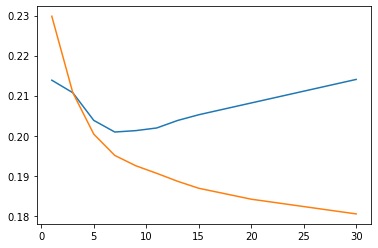

In [121]:
C = [1,3,5,7,9,11,13,15,20,30]

# insert code here
rmse_val = []
rmse_train =[]
for c in C:
    svr = SVR(gamma = 'scale', C=c, kernel='rbf')
    svr.fit(X_train, y_train)
    preds_val = svr.predict(X_val)
    preds_train = svr.predict(X_train)
    rmse_val.append(Score(y_val, preds_val))
    rmse_train.append(Score(y_train, preds_train))      

print(rmse_val, rmse_train)
plt.plot(C, rmse_val)
plt.plot(C, rmse_train)

## For what value of C does the model start to overfit the training data?
C=7

## Regression Tree
There are multiple hyperparameters that can be tuned in a regression tree.

Here we are only interested in the depth of the tree.

Plot for the varying depths the loss on both the validation set as well as training set.

[0.30296384760195144, 0.2664286859604726, 0.2502045265482097, 0.2844007536728804, 0.3250806217549556] [0.27887161165158764, 0.24427938122061932, 0.20905954267324742, 0.17101676478070316, 0.1323104845950919]


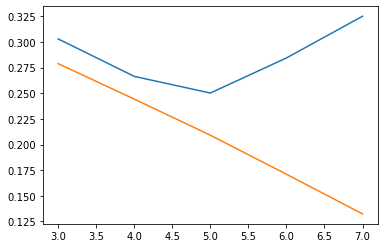

In [122]:
depth = [3,4,5,6,7]

# insert code here
rmse_dt_val = []
rmse_dt_train = []
for num in depth:
    dt = DecisionTreeRegressor(max_depth= num)
    dt.fit(X_train, y_train)
    pred_dt_val = dt.predict(X_val)
    pred_dt_train = dt.predict(X_train)
    rmse_dt_val.append(Score(y_val, pred_dt_val))
    rmse_dt_train.append(Score(y_train, pred_dt_train))
print(rmse_dt_val, rmse_dt_train)
plt.plot(depth, rmse_dt_val)
plt.plot(depth, rmse_dt_train)    

## K nearest neighbours
Here we only want to tune the value of K.

Use weigthed distance measurements.

For each value of K plot the validation set RMSE.

[0.43084007681319625, 0.291821416653729, 0.28073322797046013, 0.23381832741588238, 0.23668201862196206, 0.2419923118986841, 0.24181807811262743, 0.24161548268717956]


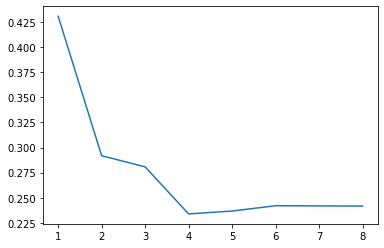

In [123]:
K = [1,2,3,4,5,6,7,8]

# insert code here
rmse_knn_val = []
for k in K:
    knn = neighbors.KNeighborsRegressor(n_neighbors= k, weights = 'distance')
    knn.fit(X_train, y_train)
    pred_knn_val = knn.predict(X_val)
    rmse_knn_val.append(Score(y_val, pred_knn_val))
print(rmse_knn_val)
plt.plot(K, rmse_knn_val)

## Comparing models
Remember to populate the 'best_models' dictionary. 

Once done succesfully, execute the following cell.


In [125]:
print("Model:\t\tRMSE:")

for key, value in best_models.items():
    if value != None:
        predictions = value.predict(X_test)
        score = Score(predictions,y_test)

    print('{}\t\t{:.3f}'.format(key,score))


Model:		RMSE:
LinReg		0.223
SVR		0.201
RegTree		0.334
KNN		0.267


## Shallow neural network

Using pytorch create a linear feed forward neural network with 10 input nodes and a single output node.

Use rectified linear unit for the activation function

In [126]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    
    # insert code here
    self.fc1 = nn.Linear(10,1)
    self.relu=nn.ReLU()
  def forward(self, x):
    
    # insert code here
    x = self.relu(self.fc1(x))
    return x

net = Net()
net.eval()

Net(
  (fc1): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

## Copy the numpy arrays containing the training, validation and test set data into pytorch tensors.

In [127]:
# insert code here
X_train_tensor = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train_tensor = torch.from_numpy(y_train).type(torch.FloatTensor)
X_val_tensor = torch.from_numpy(X_val).type(torch.FloatTensor)
y_val_tensor = torch.from_numpy(y_val).type(torch.FloatTensor)
X_test_tensor = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test_tensor = torch.from_numpy(y_test).type(torch.FloatTensor)

## Initialise the following using the torch.optim and torch.nn packages:
A Stochastic gradient descent optimiser with a learning rate of 0.01,

A MSE loss function.

In [128]:
# insert code here
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

## Complete the code below to train the neural network.
Add forward progration,

Compute the loss,

Add backward propogation and

Update the weights of the neural network.

## Furthermore, compute for each epoch the RSME on the validation set and save it in a list.

In [130]:
net.train()
valid_loss= []

for epoch in range(15):
    predicted = np.zeros(len(X_train_tensor))
    
    for x in range(len(X_train_tensor)):
        optimizer.zero_grad() #reset gradients
        
        ## 1. forward propagation
        y_pred = net(X_train_tensor[x])
        ## 2. loss calculation
        loss = loss_fn(y_pred, y_train_tensor)
        ## 3. backward propagation
        loss.backward()
        ## 4. weight optimization
        optimizer.step()
    # 5. calculate loss on validation set
    net.eval()
    y_pred_val = net(X_val_tensor)
    _, predicted = torch.max(y_pred_val.data, 1)
    loss_val = loss_fn(predicted, y_val_tensor)
    valid_loss = loss_val
    print('epoch: ' + str(epoch) + ' valid_loss: ' + str(valid_loss))

epoch: 0 valid_loss: tensor(1.0006)
epoch: 1 valid_loss: tensor(1.0006)
epoch: 2 valid_loss: tensor(1.0006)
epoch: 3 valid_loss: tensor(1.0006)
epoch: 4 valid_loss: tensor(1.0006)
epoch: 5 valid_loss: tensor(1.0006)
epoch: 6 valid_loss: tensor(1.0006)
epoch: 7 valid_loss: tensor(1.0006)
epoch: 8 valid_loss: tensor(1.0006)
epoch: 9 valid_loss: tensor(1.0006)
epoch: 10 valid_loss: tensor(1.0006)
epoch: 11 valid_loss: tensor(1.0006)
epoch: 12 valid_loss: tensor(1.0006)
epoch: 13 valid_loss: tensor(1.0006)
epoch: 14 valid_loss: tensor(1.0006)


## Plot the RSME as a funtion of epochs

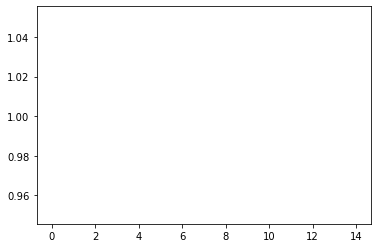

In [132]:
# insert code here
for epoch in range(15):
    plt.plot(epoch, valid_loss)

## Finally compute the RSME on the test set and print it out.

In [133]:
# insert code here
test_loss= []
net.eval()
for epoch in range(15):
    for x in range(len(X_test_tensor)):
        y_pred_val = net(X_test_tensor)
        loss_val = loss_fn(y_pred_val, y_test_tensor)
        test_loss = loss_val.item()   
    print(test_loss)

1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176
1.0315213203430176


C:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# Classification using Deep Learning

The task at hand is to classify handwritten digits using a convolutional neural network.

The dataset contains thousands of raws images of handwritten digits from 0 to 9.

Each image has 28x28 pixles and grayscale.

The dataset therefore contains 785 columns, one indicating the value of the digit, and 784 showing single pixel-values between 0 and 255. 255 indicates the darkest possible.

Execute the cell below to load in the data.

In [138]:
data = pd.read_csv('digits.csv', index_col=0)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
Idx,,,,,,,,,,,,,,,,,,,,,
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preparing the dataset

Start by seperating the input values from the target values and storing them as numpy arrays

Thereafter normalise the input data such that each pixel-value ranges from 0 to 1. 

In [139]:
# insert code here
input_data = np.array(data.iloc[:,1:785])
target_data = np.array(data.iloc[:, 0])

from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
input_data = scaled.fit_transform(input_data)

## Display the first image in the dataset.
Hint: plt.imshow() can be parsed a 2D array

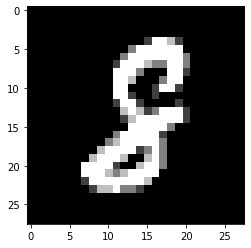

In [142]:
# insert code here
image = input_data[0].reshape((28, 28))
plt.imshow(image, cmap = 'gray')
plt.show()

## Split the dataset into a training and test set.
The training set should contain the first 9,000 records in the dataset.

The test set should contain the last 1,000 records in the dataset.

Your data should be stored in the given variable names.

In [144]:
#insert code here
train_in = input_data[:9000]
train_target = target_data[:9000]

test_in = input_data[9000:]
test_target = target_data[9000:]

## Execute the following cell as the final step in pre-processing.

The code below takes the flattened images and reshapes them for the CNN to be able to interpret them.

Thereafter, the data is placed into a Tensor Dataset and Dataloader with batches created for training.

**This cell will not execute successfully if you do not follow the given naming convention above**

In [145]:
batch_size = 64

Training_inputs = torch.from_numpy(train_in.reshape((-1,1,28,28)))
Test_inputs = torch.from_numpy(test_in.reshape((-1,1 ,28,28)))
Training_targets = torch.from_numpy(train_target)
Test_targets = torch.from_numpy(test_target)

Training_set = torch.utils.data.TensorDataset(Training_inputs.float(), Training_targets)
Test_set = torch.utils.data.TensorDataset(Test_inputs.float(), Test_targets)

Training_loader = torch.utils.data.DataLoader(Training_set, batch_size = batch_size, shuffle = True)
Test_loader = torch.utils.data.DataLoader(Test_set, batch_size = 1, shuffle = False)

## Use the following information to initialise a CNN

The CNN should incorporate the following at least one of the following layers (in this order):

- A convolutional layer (recomended kernel size = 3)

- Pooling layer (recomended kernel size = 2)

- Fully connected linear layer (recomended activation function = rectified linear unit)

You are advised to add dropout functions (recomended dropout probability = 0.25 and/or 0.5)

It is your choice how many layers of each you want to implement as well as the number of nodes each comprises.

Your final layer should consist of 10 nodes.

In [146]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # insert code here
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20,kernel_size=3)
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(10,10)
        self.dropout = nn.Dropout(0.25)
        self.relu = nn.ReLU()
    def forward(self, x):
        
        # insert code here
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        return F.log_softmax(x, dim=1)
 
cnn = CNN()

optimizer = torch.optim.Adam(cnn.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(cnn)

CNN(
  (conv1): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (relu): ReLU()
)


## Helper Functions

Complete the helper functions used to train and evaluate the CNN per epoch:

## train(data_loader, model): 
Takes in a data loader and neural network instance.

Iterate through the batches within the data loader and train the neural network for a single iteration of the entire dataset.

## evaluate(data_loader, model):
Takes in a data loader and neural network instance.

Iterate through the batches within the data loader and compute the cross entropy loss as well as the percentage correctly predicted classes.

In [147]:
def train(data_loader, model):
    model.train()
    
    for data, target in data_loader:

        optimizer.zero_grad()
        
        # insert code here
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        loss_epoch += criterion(output, target).item()
    loss_epoch /= len(data_loader.dataset)
def evaluate(data_loader, model):
    model.eval()
    loss = 0
    accuracy = 0 
    total = 0
    correct = 0
    
    with torch.no_grad():    
        for data, target in data_loader:
            
            # insert code here
            output = model(data)
            loss += criterion(output, target).item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        accuracy = (correct/total)*100
        loss /= len(data_loader.dataset)
    return loss, accuracy

## Training the CNN

If you successfully completed the helper functions, train the CNN using the cell below.

**The following question can become computationally demanding. Consider uploading this notebook to google colab for training the CNN**

Average training times is around 1~5 minutes per epoch. If you are exceeding this, re-evaluate your CNN structure or use google colab to host this notebook.

In [148]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

epochs = 10

count = 0
for epoch in range(epochs):       
    loss, accuracy = evaluate(Training_loader,cnn)
    train_loss.append(loss)
    train_acc.append(accuracy)

    loss, accuracy = evaluate(Test_loader,cnn)
    test_loss.append(loss)
    test_acc.append(accuracy)

    train(Training_loader,cnn)

    print('Training epcoh #: ', (epoch+1),'/', epochs)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (16640x13 and 10x10)

## Ploting results

Plot the recorded loss during training for both the training set and test set as a function of epochs.

In [ ]:
# insert code here

Plot the recorded accuracy during training for both the training set and test set as a function of epochs.

In [ ]:
# insert code here

## Show your results on the test set as a confusion matrix.

Hint: write a helper function to first populate an array with the predicted labels.

In [ ]:
# insert code here

## Try and achieve a final accuracy on the test set of 97 percent.

Things to consider:

Add additional convolution or linear layers to the neural network.

Change convolution kernel size.

Train for additional epochs. (beware of overfitting)

Multiple dropouts can be used to combat overfitting.

Try diffirent optimizers to adjust the CNN's weights.

Change the batch size during training.

Increase the training set size through data augmentation.

In [ ]:
_,score = evaluate(Test_loader, cnn)

print("Final achieved accuracy: {:.2f}%".format(score))